[nltk_data] Downloading package punkt to C:\Users\Zubair
[nltk_data]     Arif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Zubair
[nltk_data]     Arif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


INFORMATION RETRIEVAL SYSTEM
Step 1: Loading your articles.csv file
Available files in current directory:
1. Articles.csv
Using the only CSV file found: Articles.csv
Loading file: Articles.csv
Detected encoding: Windows-1252 (confidence: 0.73)
Successfully read file with Windows-1252 encoding
DATASET ANALYSIS
Dataset shape: (2692, 4)
Columns: ['Article', 'Date', 'Heading', 'NewsType']

Missing values:
Article     0
Date        0
Heading     0
NewsType    0
dtype: int64

Data types:
Article     object
Date        object
Heading     object
NewsType    object
dtype: object

News Type Distribution:
NewsType
sports      1408
business    1284
Name: count, dtype: int64

Sample of the data (first 3 rows):

Article sample values:
  Row 0: KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due to ...
  Row 1: HONG KONG: Asian markets started 2015 on an upswing in limited trading on Friday, with mainland Chin...
  Row 2: HONG KONG:  Hong Kong shares opene

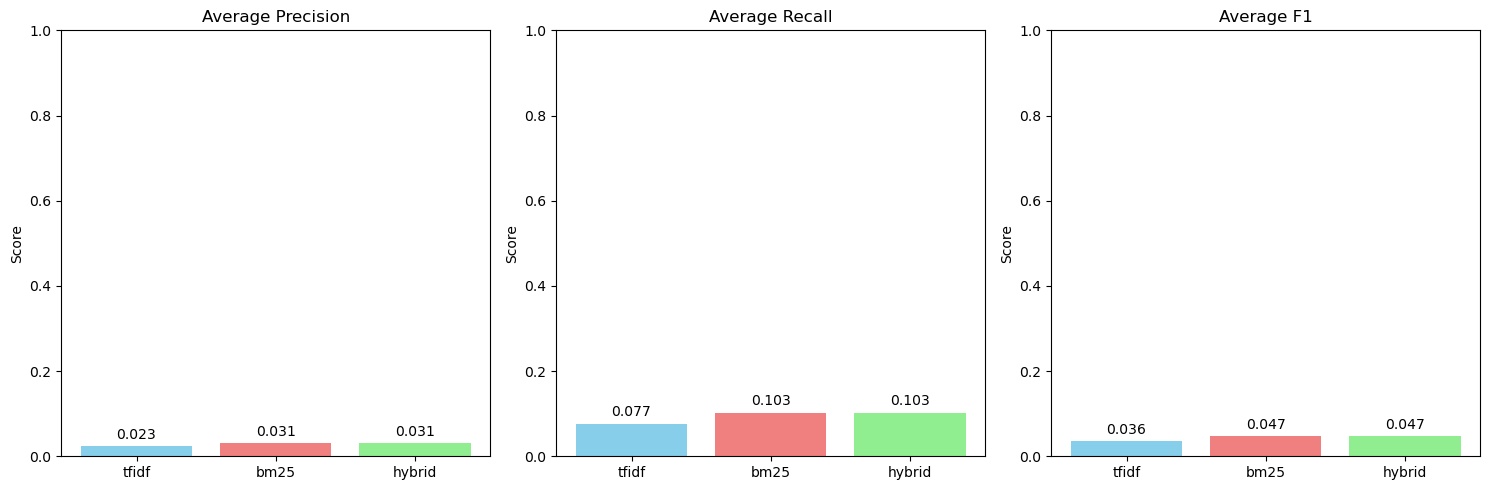


INTERACTIVE SEARCH DEMONSTRATION
Available search methods: tfidf, bm25, hybrid
You can also specify weights for hybrid search (e.g., 'hybrid:0.7:0.3')
Type 'quit' to exit the search demo

----------------------------------------


Enter your search query (or 'quit' to exit):  cricket



Searching for: 'cricket'
Method: hybrid, Weights: TF-IDF=0.50, BM25=0.50

Found 5 relevant documents:

--- Result 1 (Score: 1.0000) ---
Headline: ICC President discusses cricket with Punjab CM
Type: sports
Date: 5/15/2016
Preview: LAHORE: International Cricket Council (ICC) President Zaheer Abbas here Saturday called on Punjab Chief Minister Muhammad Shehbaz Sharif and discussed the matters regarding promotion of cricket and se...

--- Result 2 (Score: 0.9236) ---
Headline: Scotland claims top prize in ICC Annual Awards 2015
Type: sports
Date: 4/26/2016
Preview: DUBAI: Cricket Scotland has taken the top prize in the annual ICC Development Programme Awards 2015, claiming the Best Overall Cricket Development Programme Award.Cricket Scotland´s Development Progra...

--- Result 3 (Score: 0.8320) ---
Headline: Afridi questions presence of cricketing talent in Paki
Type: sports
Date: 7/13/2016
Preview: strong>LONDON: Former Pakistani cricket team captain and swashbuckling batsman Shahid Afr

Enter your search query (or 'quit' to exit):  baseball



Searching for: 'baseball'
Method: hybrid, Weights: TF-IDF=0.50, BM25=0.50
No relevant documents found.

----------------------------------------


Enter your search query (or 'quit' to exit):  hockey



Searching for: 'hockey'
Method: hybrid, Weights: TF-IDF=0.50, BM25=0.50

Found 5 relevant documents:

--- Result 1 (Score: 1.0000) ---
Headline: Pak India hockey UK visa issu
Type: sports
Date: 5/9/2016
Preview: strong>ISLAMABAD: A three match hockey series between former stars of Pakistan and Indian hockey teams that was scheduled to take place next week is likely to be delayed as some former Pakistan Olympi...

--- Result 2 (Score: 0.7346) ---
Headline: Pak India hockey veterans set for action in May
Type: sports
Date: 4/27/2016
Preview: strong>ISLAMABAD: Veteran players of Pakistan and India are all set to be in action as the United Kingdom based Slough hockey club have organized three matches against both the arch rivals in May.</st...

--- Result 3 (Score: 0.4483) ---
Headline: Pakistan beat India to clinch hockey gold in SAG
Type: sports
Date: 2/12/2016
Preview: GUWAHATI: Pakistan hockey team won a thrilling encounter against arch rivals India by 1-0 in the final of South Asian 

Enter your search query (or 'quit' to exit):  exit



Searching for: 'exit'
Method: hybrid, Weights: TF-IDF=0.50, BM25=0.50

Found 5 relevant documents:

--- Result 1 (Score: 0.9286) ---
Headline: Pound edges up after hitting 31 year 
Type: business
Date: 6/28/2016
Preview: TOKYO: The pound rose in Asia Tuesday after hitting a new 31-year low in New York on worries about the effects of Britain´s exit from the European Union, but analysts warned it could face fresh sellin...

--- Result 2 (Score: 0.9172) ---
Headline: Intikhabs report terms Afridi a clueless captai
Type: sports
Date: 4/1/2016
Preview: LAHORE: Team manager Intikhab Alam in his assessment termed Shahid Afridi a clueless captain in the wake of the team’s early exit from the tournament.Pakistan were knocked out of the World T20 after l...

--- Result 3 (Score: 0.8243) ---
Headline: West Indies become new U 19 World Cup 
Type: sports
Date: 2/14/2016
Preview: DHAKA: West Indies defeated India by five wickets in the tense final of the ICC Under-19 World Cup here at the Sher-eBan

In [ ]:
# Install required packages (run this in Jupyter notebook)
!pip install pandas numpy scikit-learn nltk matplotlib seaborn chardet

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import string
import io
import chardet
import os

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

class InformationRetrievalSystem:
    def __init__(self, k1=1.5, b=0.75):
        """
        Initialize the IR System with BM25 parameters
        k1 and b are BM25 parameters for term frequency saturation and document length normalization
        """
        self.k1 = k1
        self.b = b
        self.vectorizer = None
        self.documents = None
        self.document_vectors = None
        self.vocabulary = None
        self.document_lengths = None
        self.avg_document_length = None
        self.preprocessed_docs = None
        self.original_dataframe = None
        
    def preprocess_text(self, text):
        """
        Preprocess text: lowercase, remove punctuation, tokenize, remove stopwords, and stem
        """
        if pd.isna(text):
            return ""
        
        # Convert to lowercase
        text = str(text).lower()
        
        # Remove punctuation and numbers
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\d+', '', text)
        
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
        
        # Stemming
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(token) for token in tokens]
        
        return ' '.join(tokens)
    
    def build_index(self, dataframe):
        """
        Build the search index using TF-IDF vectorizer
        """
        self.original_dataframe = dataframe.copy()
        
        # Combine heading and article for better search
        dataframe['combined_text'] = dataframe['Heading'].fillna('') + '. ' + dataframe['Article'].fillna('')
        self.documents = dataframe['combined_text'].tolist()
        
        # Preprocessing of all documents
        print("Preprocessing documents...")
        self.preprocessed_docs = [self.preprocess_text(doc) for doc in self.documents]
        
        # Create TF-IDF vectorizer here
        self.vectorizer = TfidfVectorizer(
            max_features=10000,
            min_df=2,
            max_df=0.8,
            ngram_range=(1, 2)  # Use unigrams and bigrams
        )
        
        # now i can Fit and transform documents
        print("Building TF-IDF index...")
        self.document_vectors = self.vectorizer.fit_transform(self.preprocessed_docs)
        self.vocabulary = self.vectorizer.vocabulary_
        
        # Calculate the document lengths for BM25 model so that it will justify
        self.document_lengths = np.array(self.document_vectors.sum(axis=1)).flatten()
        self.avg_document_length = np.mean(self.document_lengths)
        
        print(f"Index built successfully! Vocabulary size: {len(self.vocabulary)}")
        print(f"Number of documents: {len(self.documents)}")
        
    def bm25_similarity(self, query_vector, doc_index):
        """
        Calculate BM25 score for a query against a document
        """
        # Get term frequencies for this document
        doc_tf = self.document_vectors[doc_index]
        
        # Calculate BM25 score here
        score = 0
        for term_idx, query_tf in enumerate(query_vector):
            if query_tf > 0:
                # Term frequency in document
                tf = doc_tf[0, term_idx]
                
                # BM25 formula
                numerator = tf * (self.k1 + 1)
                denominator = tf + self.k1 * (1 - self.b + self.b * 
                                            self.document_lengths[doc_index] / 
                                            self.avg_document_length)
                
                if denominator > 0:
                    score += (query_tf * numerator / denominator)
        
        return score
    
    def search_tfidf(self, query, top_k=10):
        """
        Search using pure TF-IDF with cosine similarity
        """
        preprocessed_query = self.preprocess_text(query)
        query_vector = self.vectorizer.transform([preprocessed_query])
        
        similarities = cosine_similarity(query_vector, self.document_vectors)
        scores = [(i, similarities[0, i]) for i in range(len(self.documents))]
        scores.sort(key=lambda x: x[1], reverse=True)
        
        return scores[:top_k]
    
    def search_bm25(self, query, top_k=10):
        """
        Search using BM25 ranking model
        """
        preprocessed_query = self.preprocess_text(query)
        query_vector = self.vectorizer.transform([preprocessed_query])
        query_dense = query_vector.toarray()[0]
        
        scores = []
        for doc_idx in range(len(self.documents)):
            score = self.bm25_similarity(query_dense, doc_idx)
            scores.append((doc_idx, score))
        
        scores.sort(key=lambda x: x[1], reverse=True)
        return scores[:top_k]
   #### i search from deepseek to tell the actual fucntion of hy brid seaarch  
    def hybrid_search(self, query, top_k=10, tfidf_weight=0.5, bm25_weight=0.5):
        """
        Hybrid search combining TF-IDF and BM25 scores 
        """
        # Get scores from both methods
        tfidf_scores = self.search_tfidf(query, top_k=len(self.documents))
        bm25_scores = self.search_bm25(query, top_k=len(self.documents))
        
        # Convert to dictionaries for easy access
        tfidf_dict = {doc_idx: score for doc_idx, score in tfidf_scores}
        bm25_dict = {doc_idx: score for doc_idx, score in bm25_scores}
        
        # Normalize scores
        max_tfidf = max(tfidf_dict.values()) if tfidf_dict.values() and max(tfidf_dict.values()) > 0 else 1
        max_bm25 = max(bm25_dict.values()) if bm25_dict.values() and max(bm25_dict.values()) > 0 else 1
        
        # Calculate hybrid scores and search from deepseek
        hybrid_scores = []
        for doc_idx in range(len(self.documents)):
            tfidf_norm = tfidf_dict.get(doc_idx, 0) / max_tfidf
            bm25_norm = bm25_dict.get(doc_idx, 0) / max_bm25
            
            hybrid_score = (tfidf_weight * tfidf_norm) + (bm25_weight * bm25_norm)
            hybrid_scores.append((doc_idx, hybrid_score))
        
        # Sort by hybrid score
        hybrid_scores.sort(key=lambda x: x[1], reverse=True)
        
        return hybrid_scores[:top_k]
    
    def search(self, query, top_k=10, method='hybrid', tfidf_weight=0.5, bm25_weight=0.5):
        """
        Unified search function with multiple ranking methods
        """
        if self.vectorizer is None:
            raise ValueError("Index not built. Call build_index first.")
        
        if method == 'tfidf':
            scores = self.search_tfidf(query, top_k)
        elif method == 'bm25':
            scores = self.search_bm25(query, top_k)
        elif method == 'hybrid':
            scores = self.hybrid_search(query, top_k, tfidf_weight, bm25_weight)
        else:
            raise ValueError("Method must be 'tfidf', 'bm25', or 'hybrid'")
        
        # Format results
        results = []
        for doc_idx, score in scores:
            if score > 0:  # Only include documents with positive scores
                original_row = self.original_dataframe.iloc[doc_idx]
                results.append({
                    'document_index': doc_idx,
                    'score': score,
                    'heading': original_row['Heading'],
                    'article_preview': str(original_row['Article'])[:200] + "..." if len(str(original_row['Article'])) > 200 else str(original_row['Article']),
                    'date': original_row['Date'],
                    'news_type': original_row['NewsType'],
                    'full_content': str(original_row['Article'])
                })
        
        return results
    
    def evaluate_query(self, query, true_relevant_docs, top_k=10, method='hybrid'):
        """
        Evaluate a single query using precision@k, recall@k, and F1@k
        """
        results = self.search(query, top_k=top_k, method=method)
        retrieved_docs = set([result['document_index'] for result in results])
        true_relevant = set(true_relevant_docs)
        
        # Calculate metrics
        true_positives = len(retrieved_docs.intersection(true_relevant))
        false_positives = len(retrieved_docs - true_relevant)
        false_negatives = len(true_relevant - retrieved_docs)
        
        precision = true_positives / len(retrieved_docs) if len(retrieved_docs) > 0 else 0
        recall = true_positives / len(true_relevant) if len(true_relevant) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        return {
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'true_positives': true_positives,
            'false_positives': false_positives,
            'false_negatives': false_negatives,
            'retrieved_count': len(retrieved_docs)
        }

def detect_encoding(file_path):
    """
    Detect the encoding of the file
    """
    with open(file_path, 'rb') as file:
        raw_data = file.read()
        result = chardet.detect(raw_data)
        encoding = result['encoding']
        confidence = result['confidence']
        print(f"Detected encoding: {encoding} (confidence: {confidence:.2f})")
        return encoding

def load_dataset_jupyter():
    """
    Function to load dataset in Jupyter Notebook
    """
    print("Available files in current directory:")
    files = [f for f in os.listdir('.') if f.endswith('.csv')]
    for i, file in enumerate(files):
        print(f"{i+1}. {file}")
    
    if not files:
        print("No CSV files found in current directory.")
        print("Please make sure your articles.csv file is in the same directory as this notebook.")
        return None
    
    if len(files) == 1:
        filename = files[0]
        print(f"Using the only CSV file found: {filename}")
    else:
        try:
            choice = int(input(f"Enter the number of the file to use (1-{len(files)}): "))
            filename = files[choice-1]
        except (ValueError, IndexError):
            print("Invalid choice. Using the first file.")
            filename = files[0]
    
    print(f"Loading file: {filename}")
    
    # Detect encoding
    encoding = detect_encoding(filename)
    
    # Try to read with detected encoding
    try:
        df = pd.read_csv(filename, encoding=encoding)
        print(f"Successfully read file with {encoding} encoding")
        return df
    except UnicodeDecodeError:
        print(f"Failed to read with {encoding}, trying common encodings...")
        # Try common encodings
        encodings_to_try = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252', 'windows-1252']
        for enc in encodings_to_try:
            try:
                df = pd.read_csv(filename, encoding=enc)
                print(f"Successfully read file with {enc} encoding")
                return df
            except UnicodeDecodeError:
                continue
        
        # If all else fails, try with error handling
        print("Trying with error handling...")
        df = pd.read_csv(filename, encoding='utf-8', errors='replace')
        return df

def load_and_analyze_data(df):
    """
    Load and analyze the dataset
    """
    print("=" * 60)
    print("DATASET ANALYSIS")
    print("=" * 60)
    
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    # Check for missing values
    print(f"\nMissing values:")
    print(df.isnull().sum())
    
    # Display data types
    print(f"\nData types:")
    print(df.dtypes)
    
    # Check for NewsType column
    if 'NewsType' in df.columns:
        print(f"\nNews Type Distribution:")
        print(df['NewsType'].value_counts())
    else:
        print("\nWarning: 'NewsType' column not found in dataset")
        # Check what columns we have
        print("Available columns:", df.columns.tolist())
    
    # Display sample data
    print(f"\nSample of the data (first 3 rows):")
    for col in df.columns:
        print(f"\n{col} sample values:")
        for i, val in enumerate(df[col].head(3)):
            print(f"  Row {i}: {str(val)[:100]}{'...' if len(str(val)) > 100 else ''}")
    
    return df

def create_test_queries(df):
    """
    Create sample test queries for evaluation based on actual content
    """
    test_queries = {}
    
    # Check if NewsType column exists
    if 'NewsType' in df.columns:
        # Business-related queries
        business_docs = df[df['NewsType'] == 'business'].index.tolist()
        if business_docs:
            test_queries["business news"] = business_docs[:min(5, len(business_docs))]
        
        # Sports-related queries
        sports_docs = df[df['NewsType'] == 'sports'].index.tolist()
        if sports_docs:
            test_queries["sports news"] = sports_docs[:min(5, len(sports_docs))]
    else:
        print("Warning: No NewsType column for creating category-based queries")
    
    # Content-based queries using Article column
    if 'Article' in df.columns:
        # Look for specific business terms
        business_terms = ['earnings', 'profit', 'revenue', 'company', 'market', 'business']
        for term in business_terms:
            term_docs = df[df['Article'].str.contains(term, case=False, na=False)].index.tolist()
            if term_docs and f"{term} news" not in test_queries:
                test_queries[f"{term} news"] = term_docs[:min(3, len(term_docs))]
        
        # Look for specific sports terms
        sports_terms = ['football', 'soccer', 'match', 'game', 'player', 'sports']
        for term in sports_terms:
            term_docs = df[df['Article'].str.contains(term, case=False, na=False)].index.tolist()
            if term_docs and f"{term} news" not in test_queries:
                test_queries[f"{term} news"] = term_docs[:min(3, len(term_docs))]
    
    # General queries - ensure we have at least some queries
    if not test_queries:
        print("Creating general queries based on available data...")
        test_queries["general news"] = df.sample(min(10, len(df))).index.tolist()
    else:
        test_queries["latest news"] = df.sample(min(8, len(df))).index.tolist()
    
    print(f"Created {len(test_queries)} test queries")
    return test_queries

def compare_search_methods(ir_system, test_queries):
    """
    Compare different search methods
    """
    methods = ['tfidf', 'bm25', 'hybrid']
    results = {method: [] for method in methods}
    
    print("\n" + "=" * 60)
    print("COMPARING SEARCH METHODS")
    print("=" * 60)
    
    for method in methods:
        print(f"\nEvaluating {method.upper()} method:")
        query_count = 0
        for query, relevant_docs in test_queries.items():
            if relevant_docs:  # Only evaluate if there are relevant documents
                eval_result = ir_system.evaluate_query(query, relevant_docs, method=method)
                results[method].append(eval_result)
                query_count += 1
        
        if query_count > 0:
            avg_precision = np.mean([r['precision'] for r in results[method]])
            avg_recall = np.mean([r['recall'] for r in results[method]])
            avg_f1 = np.mean([r['f1'] for r in results[method]])
            
            print(f"Average Precision: {avg_precision:.3f}")
            print(f"Average Recall: {avg_recall:.3f}")
            print(f"Average F1-Score: {avg_f1:.3f}")
        else:
            print("No valid queries to evaluate")
    
    return results

def plot_comparison(results):
    """
    Plot comparison of different search methods
    """
    methods = list(results.keys())
    metrics = ['precision', 'recall', 'f1']
    
    avg_scores = {}
    for method in methods:
        if results[method]:  # Check if there are results
            avg_scores[method] = {
                'precision': np.mean([r['precision'] for r in results[method]]),
                'recall': np.mean([r['recall'] for r in results[method]]),
                'f1': np.mean([r['f1'] for r in results[method]])
            }
    
    if not avg_scores:
        print("No results to plot")
        return {}
    
    # Create comparison plot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    for idx, metric in enumerate(metrics):
        method_names = list(avg_scores.keys())
        scores = [avg_scores[method][metric] for method in method_names]
        
        bars = axes[idx].bar(method_names, scores, color=['skyblue', 'lightcoral', 'lightgreen'])
        axes[idx].set_title(f'Average {metric.capitalize()}')
        axes[idx].set_ylabel('Score')
        axes[idx].set_ylim(0, 1)
        
        # Add value labels on bars
        for bar, score in zip(bars, scores):
            axes[idx].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                          f'{score:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    return avg_scores

def interactive_search_demo(ir_system):
    """
    Interactive search demonstration
    """
    print("\n" + "=" * 60)
    print("INTERACTIVE SEARCH DEMONSTRATION")
    print("=" * 60)
    print("Available search methods: tfidf, bm25, hybrid")
    print("You can also specify weights for hybrid search (e.g., 'hybrid:0.7:0.3')")
    print("Type 'quit' to exit the search demo")
    
    while True:
        print("\n" + "-" * 40)
        user_input = input("Enter your search query (or 'quit' to exit): ").strip()
        
        if user_input.lower() == 'quit':
            break
            
        if not user_input:
            print("Please enter a valid query.")
            continue
        
        # Parse search method and weights
        query = user_input
        method = 'hybrid'
        tfidf_weight = 0.5
        bm25_weight = 0.5
        
        if ':' in user_input:
            parts = user_input.split(':')
            query = parts[0].strip()
            if len(parts) >= 2:
                method = parts[1].strip().lower()
            if len(parts) >= 4 and method == 'hybrid':
                try:
                    tfidf_weight = float(parts[2])
                    bm25_weight = float(parts[3])
                    # Normalize weights to sum to 1
                    total = tfidf_weight + bm25_weight
                    if total > 0:
                        tfidf_weight /= total
                        bm25_weight /= total
                except ValueError:
                    print("Invalid weights. Using default weights (0.5, 0.5)")
        
        print(f"\nSearching for: '{query}'")
        print(f"Method: {method}, Weights: TF-IDF={tfidf_weight:.2f}, BM25={bm25_weight:.2f}")
        
        try:
            results = ir_system.search(query, top_k=5, method=method, 
                                     tfidf_weight=tfidf_weight, bm25_weight=bm25_weight)
            
            if results:
                print(f"\nFound {len(results)} relevant documents:")
                for i, result in enumerate(results, 1):
                    print(f"\n--- Result {i} (Score: {result['score']:.4f}) ---")
                    print(f"Headline: {result['heading']}")
                    if 'news_type' in result:
                        print(f"Type: {result['news_type']}")
                    if 'date' in result:
                        print(f"Date: {result['date']}")
                    print(f"Preview: {result['article_preview']}")
            else:
                print("No relevant documents found.")
                
        except Exception as e:
            print(f"Error during search: {e}")
            print("Please try a different query or method.")

def main():
    """
    Main function to run the complete IR system
    """
    print("INFORMATION RETRIEVAL SYSTEM")
    print("=" * 50)
    
    try:
        # Step 1: Load dataset
        print("Step 1: Loading your articles.csv file")
        df = load_dataset_jupyter()
        
        if df is None:
            print("No dataset found. Please make sure your CSV file is in the same directory.")
            return
        
        # Step 2: Analyze data
        df = load_and_analyze_data(df)
        
        # Step 3: Initialize and build IR system
        print("\nStep 2: Building Information Retrieval System...")
        ir_system = InformationRetrievalSystem()
        ir_system.build_index(df)
        
        # Step 4: Create test queries and evaluate
        print("\nStep 3: Creating test queries for evaluation...")
        test_queries = create_test_queries(df)
        
        print(f"\nTest queries created:")
        for query, docs in test_queries.items():
            print(f"  '{query}': {len(docs)} relevant documents")
        
        # Step 5: Compare search methods
        results = compare_search_methods(ir_system, test_queries)
        
        # Step 6: Plot comparison
        if results:
            print("\nStep 4: Generating comparison plots...")
            avg_scores = plot_comparison(results)
        
        # Step 7: Interactive search
        interactive_search_demo(ir_system)
        
        print("\n" + "=" * 50)
        print("IR System Execution Complete!")
        print("=" * 50)
        
    except Exception as e:
        print(f"\nError: {e}")
        print("Please check your file and try again.")
        print("If the problem persists, try saving your CSV file with UTF-8 encoding.")

if __name__ == "__main__":
    main()